<table  align="left" width="100%"> <tr>
        <td  style="background-color:#ffffff;"><a href="https://qworld.net" target="_blank"><img src="../images/qworld.jpg" width="35%" align="left"></a></td>
        <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
            prepared by Özlem Salehi (<a href="https://qworld.net/qturkey/" target="_blank">QTurkey</a>)
        </td>        
</tr></table>

<h1> Introduction to Qiskit </h1>

<hr>

<hr>

<h2>Creating quantum and classical registers</h2>

In Qiskit, we use a _quantum register_ to store our qubits.

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# 4 is the number of qubits we want to create
# qreg is the name of the quantum register
qreg =  QuantumRegister(4) 

In [3]:
# You can give any name to your register
output = QuantumRegister(1)

Whenever a qubit is measured (which will be discussed soon), the result should be stored in a classical bit. We create a _classical register_ to store our classical bits.

In [4]:
# 4 is the number of classical bits we want to create
# creg is the name of the classical register
creg = ClassicalRegister(4) 

<hr>
<h2>Creating Circuits</h2>

A quantum circuit is composed of quantum and classical registers.

In [5]:
# Creating a quantum circuit consisting of quantum register qreg and classical register creg
circuit = QuantumCircuit(qreg,creg)

In [6]:
# You can create a quantum circuit with multiple quantum registers
circuit2 = QuantumCircuit(qreg, output, creg)

In [7]:
# You can create a quantum circuit consisting of only a quantum register if no measurement will take place
circuit3 = QuantumCircuit(qreg)

In [8]:
# Creating a quantum circuit without specfiying any registers is also possible 
# Creates a quantum circuit with 3 qubits and 3 classical bits
circuit4 = QuantumCircuit(3,3)

<hr>
<h2>Gates</h2>

Here are some _gates_ and how we apply them in Qiskit. Gates are applied to quantum circuit by specifying the qubits which they apply to.

In [9]:
#Apply NOT gate to qubit 2
circuit.x(qreg[2])

#Apply Z gate to qubit 2
circuit.z(qreg[2])

#Apply H gate to qubit 3
circuit.h(qreg[3])

#Apply CNOT gate where qubit 2 is control and qubit 0 is target
circuit.cx(qreg[2],qreg[0])

#Apply CZ gate where qubit 0 is control and qubit 1 is target
circuit.cz(qreg[0],qreg[1])

#Apply SWAP gates to qubits 1 and 3 
circuit.swap(qreg[1],qreg[3])

#Apply CCNOT gate where qubit 0 and 1 are the control and qubit 2 is the target
#Note that in Qiskit, it is possible to apply gates without specifying the register
circuit.ccx(0,1,2)

Let's draw our circuit to visualize the operations.

In [10]:
circuit.draw()

┌───┐           
q0_0: ──────────┤ X ├─■──────■──
                └─┬─┘ │      │  
q0_1: ────────────┼───■──X───■──
      ┌───┐┌───┐  │      │ ┌─┴─┐
q0_2: ┤ X ├┤ Z ├──■──────┼─┤ X ├
      ├───┤└───┘         │ └───┘
q0_3: ┤ H ├──────────────X──────
      └───┘                     
c0: 4/══════════════════════════

You may also use matplotlib to visualize your circuits.

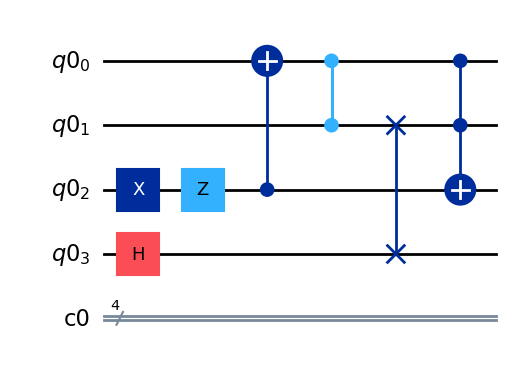

In [11]:
circuit.draw(output='mpl')

### Task 1
    
Create a quantum circuit with 10 qubits. 

1. Apply $H$ gate to qubit 0. 
2. Apply nine $CNOT$ gates where qubit $0$ is the control and qubit $i$ is the target for $i=1\cdots9$.

Draw your circuit.

In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 10 qubits
qreg = QuantumRegister(10)
creg = ClassicalRegister(10) #For this question we don't need to create this

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H to qubit 0
circuit.h(qreg[0])

# Apply CX gates
for i in range(1,10):
    circuit.cx(qreg[0],qreg[i])
    
circuit.draw()

┌───┐                                             
 q8_0: ┤ H ├──■────■────■────■────■────■────■────■────■──
       └───┘┌─┴─┐  │    │    │    │    │    │    │    │  
 q8_1: ─────┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼──
            └───┘┌─┴─┐  │    │    │    │    │    │    │  
 q8_2: ──────────┤ X ├──┼────┼────┼────┼────┼────┼────┼──
                 └───┘┌─┴─┐  │    │    │    │    │    │  
 q8_3: ───────────────┤ X ├──┼────┼────┼────┼────┼────┼──
                      └───┘┌─┴─┐  │    │    │    │    │  
 q8_4: ────────────────────┤ X ├──┼────┼────┼────┼────┼──
                           └───┘┌─┴─┐  │    │    │    │  
 q8_5: ─────────────────────────┤ X ├──┼────┼────┼────┼──
                                └───┘┌─┴─┐  │    │    │  
 q8_6: ──────────────────────────────┤ X ├──┼────┼────┼──
                                     └───┘┌─┴─┐  │    │  
 q8_7: ───────────────────────────────────┤ X ├──┼────┼──
                                          └───┘┌─┴─┐  │  
 q8_8: ────────────────────────────────────────┤ X ├──┼──
                                               └───┘┌─┴─┐
 q8_9: ─────────────────────────────────────────────┤ X ├
                                                    └───┘
c4: 10/══════════════════════════════════════════════════

<h2> More about gates </h2>

It is possible to apply a gate to multiple qubits at once.

In [27]:
# Create a new circuit
circuit2 = QuantumCircuit(qreg,creg)
circuit2.h(qreg)
circuit2.draw()

┌───┐
 q8_0: ┤ H ├
       ├───┤
 q8_1: ┤ H ├
       ├───┤
 q8_2: ┤ H ├
       ├───┤
 q8_3: ┤ H ├
       ├───┤
 q8_4: ┤ H ├
       ├───┤
 q8_5: ┤ H ├
       ├───┤
 q8_6: ┤ H ├
       ├───┤
 q8_7: ┤ H ├
       ├───┤
 q8_8: ┤ H ├
       ├───┤
 q8_9: ┤ H ├
       └───┘
c4: 10/═════

<i>controlled</i> function creates the controlled version of a gate.

In [14]:
# To be able to use the control function with H gate, we need to import H gate class
from qiskit.circuit.library.standard_gates import HGate

CCCH = HGate().control(3)

# The first 3 qubits act as the control and the last qubit is the target
circuit2.append(CCCH,[0,1,3,2])

circuit2.draw()

┌───┐     
q0_0: ┤ H ├──■──
      ├───┤  │  
q0_1: ┤ H ├──■──
      ├───┤┌─┴─┐
q0_2: ┤ H ├┤ H ├
      ├───┤└─┬─┘
q0_3: ┤ H ├──■──
      └───┘     
c0: 4/══════════

One can define new gates by arithmetic operations as well

In [15]:
from qiskit.circuit.library.standard_gates import XGate
ROOTX = XGate().power(exponent=0.5)
circuit2.append(ROOTX,[1])
circuit2.draw()

┌───┐              
q0_0: ┤ H ├──■───────────
      ├───┤  │  ┌───────┐
q0_1: ┤ H ├──■──┤ x^0.5 ├
      ├───┤┌─┴─┐└───────┘
q0_2: ┤ H ├┤ H ├─────────
      ├───┤└─┬─┘         
q0_3: ┤ H ├──■───────────
      └───┘              
c0: 4/═══════════════════

### Task 2
    
Create a quantum circuit with 10 qubits. 

1. Apply $H$ gates to all qubits.
2. Apply $X$ gate to qubit 0 controlled by qubits 1-9
2. Apply $H$ gates to all qubits.

Draw your circuit.

In [28]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library.standard_gates import XGate

# Create quantum and classical registers with 10 qubits
qreg = QuantumRegister(10)
creg = ClassicalRegister(10) #For this question we don't need to create classical register

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H to all qubits
circuit.h(qreg)

# Create a controlled version of the NOT gate
C9X = XGate().control(9)

# Qubits 1-9 are the control and qubit 0 is the target
# In python, you can use + to concatanate to lists
circuit.append(C9X,list(range(1,10)) + [0])

# Apply H to all qubits
circuit.h(qreg)

circuit.draw()

┌───┐┌───┐┌───┐
 q9_0: ┤ H ├┤ X ├┤ H ├
       ├───┤└─┬─┘├───┤
 q9_1: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_2: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_3: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_4: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_5: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_6: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_7: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_8: ┤ H ├──■──┤ H ├
       ├───┤  │  ├───┤
 q9_9: ┤ H ├──■──┤ H ├
       └───┘     └───┘
c5: 10/═══════════════

<hr>
<h2>Running Circuits</h2>

One way to get results from your circuit is to measure and run it for multiple times. 

Let's first create a simple circuit and measure it. 

In [30]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(1) 

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# Measure both qubits
circuit.measure(qreg[0],creg[0])

Next we will run our circuit multiple times and take samples.

In [31]:
from qiskit_aer import AerSimulator

# First create a simulator and execute it.
job = AerSimulator().run(circuit,shots=100)

# Get the results as a dictionary
counts = job.result().get_counts(circuit)
print(counts) 

{'1': 50, '0': 50}


The output of the circuit are the states $\ket{00}$ and $\ket{01}$ and they are measued almost equal number of times. At this point, we need to make a note about the order of the qubits in Qiskit.

Qiskit combines the two quantum bits in the following order:

$$ qreg[1], qreg[0]$$

For example, when $X$ gate is applied to qreg[0], the state $\ket{00}$ becomes $\ket{01}$. If you want to obtain state $\ket{10}$, then you should apply $X$ gate to qreg[1].


It is also possible to measure only some of the qubits. Let's only measure qreg[0] this time.

In [19]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(1) # It is enough to create a clasical register with 1 bit

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# Measure qreg[0]
circuit.measure(qreg[0],creg[0])

job = AerSimulator().run(circuit,shots=1000)
counts = job.result().get_counts()
print(counts) 

{'0': 492, '1': 508}


### Task 3
    
Implement the circuit in Task 1. Measure all the qubits and simulate your circuit for 1000 times.

In [32]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator


# Create quantum and classical registers with 10 qubits
qreg = QuantumRegister(10)
creg = ClassicalRegister(10)

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H to qubit 0
circuit.h(qreg[0])

# Apply CX gates
for i in range(1,10):
    circuit.cx(qreg[0],qreg[i])
    
circuit.measure(qreg,creg)

# This is the local simulator 
# Shots is the how many times we want to run the circuit
job = AerSimulator().run(circuit,shots=1000)

# Get the results as a dictionary
counts = job.result().get_counts(circuit)
print(counts) 

{'1111111111': 486, '0000000000': 514}


## Debugging the circuits - State Representation

It is possible to get the exact quantum state from the simulator. You shouldn't measure your circuit before getting the state. 

We will use the <i>StatevectorSimulator</i> backend to obtain the vector representing the quantum state.

In [33]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator

# Create quantum and classical registers with 2 qubits
qreg = QuantumRegister(2)
creg = ClassicalRegister(2)

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to qubit 0
circuit.h(qreg[0])

# This is the statevector simulator
job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state) 

Statevector([0.707+0.j, 0.707+0.j, 0.   +0.j, 0.   +0.j],
            dims=(2, 2))


If you use simulator after the measurement, you will observe that the quantum state has collapsed to one of the states.

In [34]:
circuit.measure(qreg,creg)
job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state) 

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


### Task 4
    
Create a quantum circuit with 4 qubits. Apply Hadamard gate to each qubit and $CZ$ gate to qreg[3] and qreg[2]. Use the simulator without measuring the circuit. Check the entries with negative sign.

In [35]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import StatevectorSimulator
#
# Create quantum and classical registers with 4 qubits
qreg = QuantumRegister(4)
creg = ClassicalRegister(4)

# Create a new circuit
circuit = QuantumCircuit(qreg,creg)

# Apply H gate to all qubits
circuit.h(qreg)

# Apply Z gate to qreg[0]
circuit.cz(qreg[3],qreg[2])

job = StatevectorSimulator().run(circuit)
state = job.result().get_statevector(decimals=3)
print(state) 


Statevector([ 0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
              0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
              0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
             -0.25+0.j],
            dims=(2, 2, 2, 2))


The states $\ket{1100}$, $\ket{1101}$, $\ket{1110}$, $\ket{1111}$ have the negative sign.

<hr>
<h2>Unitary Matrix Representation</h2>

It is possible to obtain <i>unitary</i> matrix representation of gates and circuits.

In [24]:
from qiskit.circuit.library.standard_gates import XGate, CXGate

ROOTX = XGate().power(exponent=0.5)

print('Unitary matrix representation of the CNOT gate')
print(CXGate().to_matrix())
print('Unitary matrix representation of the ROOTX gate we have created')
print(ROOTX.to_matrix())

Unitary matrix representation of the CNOT gate
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
Unitary matrix representation of the ROOTX gate we have created
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]


In [36]:
from qiskit_aer import UnitarySimulator

# Quantum register with 2 qubits
qreg = QuantumRegister(2)
circuit = QuantumCircuit(qreg)

# Apply H gate to all qubits
circuit.h(qreg)

# Unitary simulator
job = UnitarySimulator().run(circuit)
matrix = job.result().get_unitary(decimals=3)

print('Unitary matrix representation of H operator on 2 qubits.')
print(matrix) 

Unitary matrix representation of H operator on 2 qubits.
Operator([[ 0.5+0.j,  0.5-0.j,  0.5-0.j,  0.5-0.j],
          [ 0.5+0.j, -0.5+0.j,  0.5-0.j, -0.5+0.j],
          [ 0.5+0.j,  0.5-0.j, -0.5+0.j, -0.5+0.j],
          [ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5-0.j]],
         input_dims=(2, 2), output_dims=(2, 2))
